In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import math

%matplotlib inline

# This serves as a check on our choice of process noise values.
Radar95_confi = 7.82

# Laser measurements have 2 degrees of freedom,
# so the threshold is different.
Lidar95_confi = 5.99

#input file fields as they are saved into the UKF output file
my_cols = ['px_meas','py_meas','NIS_radar', 'NIS_laser', 'px', 'py']
with open('./build/data_out.txt') as f:
    table_ekf_output = pd.read_table(f, sep=';', header=None, names=my_cols, lineterminator='\n')
    
table_ekf_output[0:5]  



,px_meas,py_meas,NIS_radar,NIS_laser,px,py
0,0.862916,0.534212,74.70330,0.000000,0.735392,0.629523
1,1.173850,0.481073,74.70330,0.221055,1.160500,0.494947
2,0.969149,0.397513,1.82490,0.221055,1.258040,0.533077
3,1.650630,0.624690,1.82490,0.167486,1.615800,0.595362
4,1.623310,0.499091,7.71399,0.167486,1.851100,0.561849


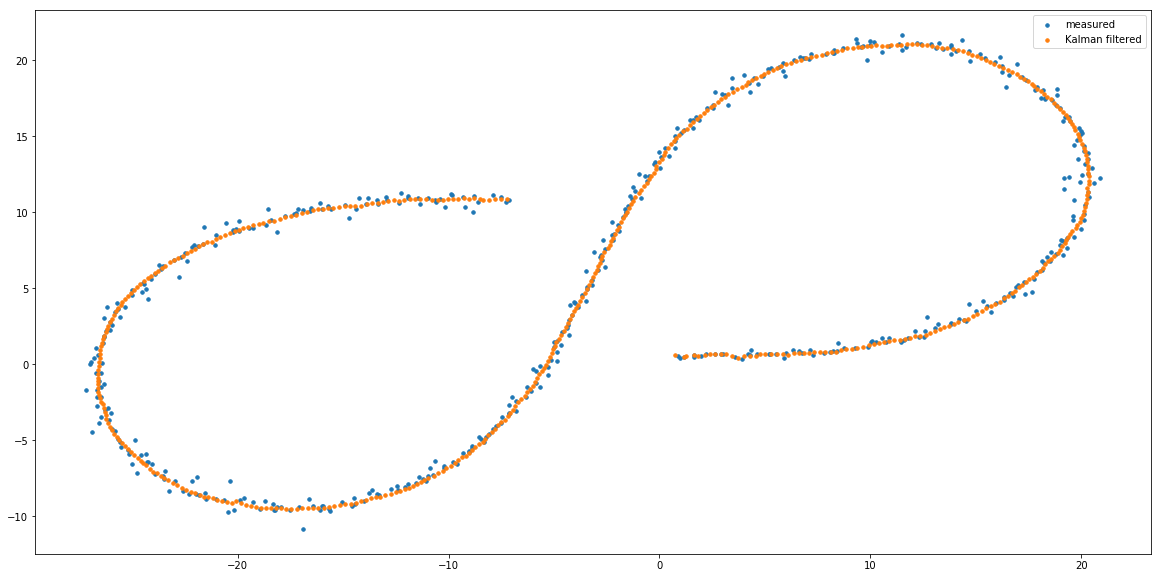

In [6]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot(111)
plt.scatter(table_ekf_output['px_meas'],table_ekf_output['py_meas'], s=12)
plt.scatter(table_ekf_output['px'],table_ekf_output['py'], s=12)
ax1.legend(['measured', 'Kalman filtered'])

plt.savefig('./images/Meas_vs_Kalmanfilt.png')

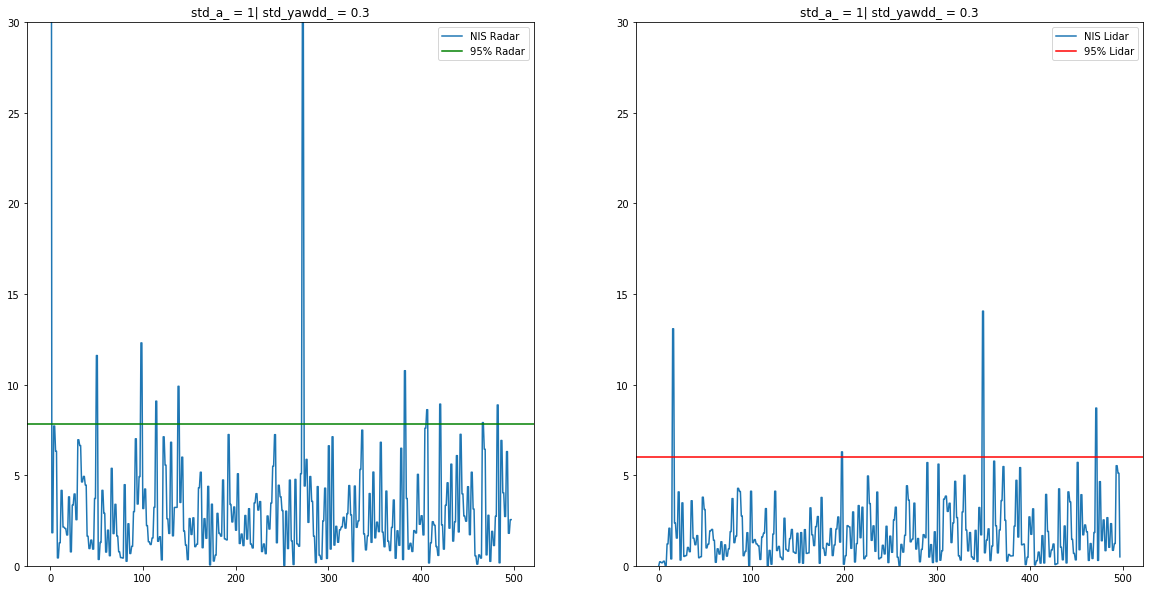

In [7]:

plt.figure(figsize=(20,10))
ax1 = plt.subplot(121)
plt.title('std_a_ = 1| std_yawdd_ = 0.3')
plt.plot(table_ekf_output['NIS_radar'])
plt.axhline(Radar95_confi, color = 'g')
ax1.legend(['NIS Radar', '95% Radar'])
ax1.set_ylim([0, 30])



#######
ax2 = plt.subplot(122)
plt.title('std_a_ = 1| std_yawdd_ = 0.3')

plt.plot(table_ekf_output['NIS_laser'])
plt.axhline(Lidar95_confi, color = 'r')
ax2.legend(['NIS Lidar', '95% Lidar'])
ax2.set_ylim([0, 30])

plt.savefig('./images/NIS_process_noise.png')